# Scratch notebook for evaluation of CCLM

In [15]:
import valenspy as vp

import xarray as xr
from pathlib import Path
import cdo 
from yaml import safe_load
import os
from eval_functions import *
import warnings

# Turn off all warnings
warnings.filterwarnings('ignore')

# define machine name - used for paths of (observational) datasets
machine = 'hortense'

# postprocessing base directory 
postproc_base_dir = "/dodrio/scratch/projects/2022_200/RCS/CORDEXBE2/postprocessing/"

src_path = Path("../src/valenspy")


In [25]:

# reference dataset to compare to
model = 'CCLM'

# get lookup file for model
with open(src_path / "ancilliary_data" / Path(model+"_lookup.yml")) as file:
    mod_LOOKUP = safe_load(file)

# secondary list of variables to compare
# cloud characteristics (integrated cloud water, ice, graupel, snow and rain) (NOT YET IN CORDEX_VARIABLES list)
# ERA5-land: surface fluxes: latent heat, sensible heat




### 1. Define plotting function

In [26]:
import xarray as xr

ds = xr.open_dataset("/dodrio/scratch/projects/2022_200/RCS/CORDEXBE2/postprocessing/EUR11_CO_TA_GC_TSO/T_2M/T_2M_diurnal_mean_1995-1995_5-5.nc")

<xarray.DataArray 'time' (time: 24)> Size: 192B
array(['1995-05-31T00:00:00.000000000', '1995-05-31T01:00:00.000000000',
       '1995-05-31T02:00:00.000000000', '1995-05-31T03:00:00.000000000',
       '1995-05-31T04:00:00.000000000', '1995-05-31T05:00:00.000000000',
       '1995-05-31T06:00:00.000000000', '1995-05-31T07:00:00.000000000',
       '1995-05-31T08:00:00.000000000', '1995-05-31T09:00:00.000000000',
       '1995-05-31T10:00:00.000000000', '1995-05-31T11:00:00.000000000',
       '1995-05-31T12:00:00.000000000', '1995-05-31T13:00:00.000000000',
       '1995-05-31T14:00:00.000000000', '1995-05-31T15:00:00.000000000',
       '1995-05-31T16:00:00.000000000', '1995-05-31T17:00:00.000000000',
       '1995-05-31T18:00:00.000000000', '1995-05-31T19:00:00.000000000',
       '1995-05-31T20:00:00.000000000', '1995-05-31T21:00:00.000000000',
       '1995-05-31T22:00:00.000000000', '1995-05-31T23:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time       (time) datetime64[ns] 192B 1995-05-31 ... 1995-05-31T23:00:00
    height_2m  float32 4B ...
Attributes:
    standard_name:  time
    long_name:      time
    bounds:         time_bnds
    axis:           T

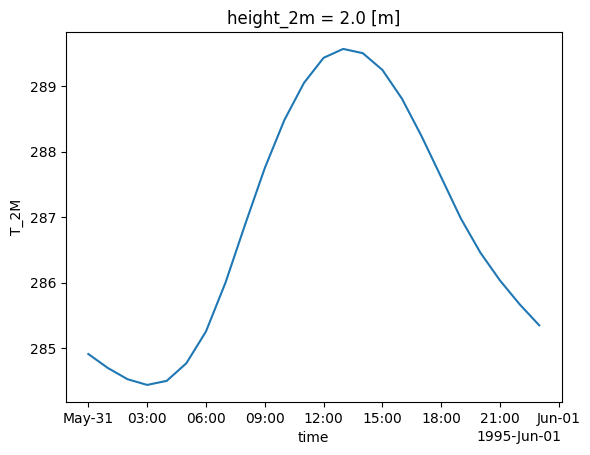

In [24]:
ds["T_2M"].mean(dim=('rlat','rlon')).plot() 

ds["T_2M"].time

In [19]:
# directory with experiments


experiments = ["EUR11_CO_TA_GC_TSO"]

In [20]:
# define bounds 
bounds = {'europe':
                    {'lat_bounds': [70,35], 
                    'lon_bounds': [-15,40]}, 
        'belgium': 
                    {'lat_bounds': [52,49], 
                    'lon_bounds': [2,7]}}

In [21]:
region = 'europe'
variable = 'tas'
ref_dataset = "ERA5"

months_to_analyse = [7,8]

# ------------------------------
# 1. Load reference data



# retrieve ERA5 gridfile - for regridding 
gridfile = manager._get_file_paths(ref_dataset, variable, period=[1995,1995], freq="daily", region=region, path_identifiers = ["-daily-"])[0]



File paths found:
/dodrio/scratch/projects/2022_200/project_input/External/observations/era5/europe/daily/2m_temperature/era5-daily-europe-2m_temperature-1995.nc
The file is ValEnsPy CF compliant.
50.00% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['tas']
Unknown to ValEnsPy: ['time_bnds']


#### total cloud percentage

File paths found:
/dodrio/scratch/projects/2022_200/project_input/External/observations/era5-land/belgium/daily/surface_latent_heat_flux/era5-land-daily-belgium-surface_latent_heat_flux-1995.nc
The file is ValEnsPy CF compliant.
50.00% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['hfls']
Unknown to ValEnsPy: ['time_bnds']
EUR11_CO_TA_GC_TSO
cdo    remapbil: Bilinear weights from curvilinear (446x434) to lonlat (41x25) grid


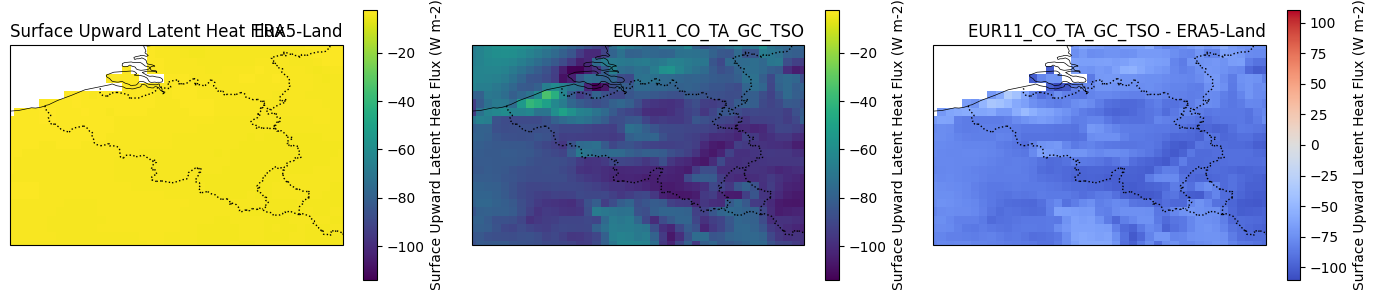

In [ ]:
region = 'belgium'
variable = 'hfls'
ref_dataset = "ERA5-Land"
months_to_analyse = [7,8]

fig = load_calc_plot_bias_map(variable, ref_dataset, experiments , months_to_analyse, region)


File paths found:
/dodrio/scratch/projects/2022_200/project_input/External/observations/era5-land/belgium/daily/surface_sensible_heat_flux/era5-land-daily-belgium-surface_sensible_heat_flux-1995.nc
The file is ValEnsPy CF compliant.
50.00% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['hfss']
Unknown to ValEnsPy: ['time_bnds']
EUR11_CO_TA_GC_TSO
cdo    remapbil: Bilinear weights from curvilinear (446x434) to lonlat (41x25) grid


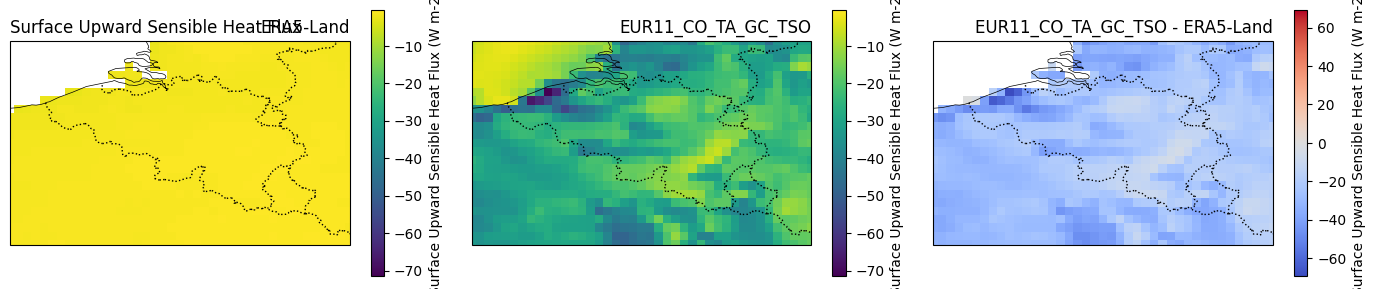

In [ ]:
region = 'belgium'
variable = 'hfss'
ref_dataset = "ERA5-Land"
months_to_analyse = [7,8]

fig = load_calc_plot_bias_map(variable, ref_dataset, experiments , months_to_analyse, region)
